<a href="https://colab.research.google.com/github/swastiknath/Coursera_Capstone/blob/master/IBM_EARTH_QUAKE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Locating the Earthquake Heavy Regions and Vulnerable to Earthquake Hotels in the United States. </h1>
<h3> IBM APPLIED DATA SCIENCE CAPSTONE.  </h3>



---

<h2> Contents: </h2>


1.  [INTRODUCTION: BUSINESS APPROACH](#intro)
2.  [ALL ABOUT DATA AND DATA PROVIDERS](#data) 
3.  [METHODOLOGY](#methodology)
4.  [DATA ANALYSIS](#analysis)
5.  [ANALYSIS RESULTS AND A FEW WORDS](#results)
6. [CONCLUSION](#conclusion)


---






# Introduction : Business Approach <a name = 'intro'></a>



This assignment is aimed to determine the earthquake heavy regions in the United States and to find the vulnerable to earthquake hotels across the Unites States. This assignment will be helpful to the government city management departments and or, stakeholders of the hotels to determine if the place where they are constructing or have contructed hotels are safe from earthquakes and if not, it will trigger them to inspect for the structural security. 

As, United States and it's neighbourhoods and their vicnity are always ready for business and cultural programmes, it's obvious that there are so many hotels around the cities we choose. But we will use a different approach, called Vulnerable Occurence (frequency of occurrence as a nearby hotel per recoded place) to determine the vulnerabiliteies in different hotels. 

In this project we will use different data science tools to determine the vulnerable places and hotels near them. While applying the tools, we will follow the methodical framework as prescribed by Dr. John Rollins of IBM.

# All about the Data and the Data Providers. <a name = 'data'></a>

As the problem we are facing, the following are the primary investigation about the data:


*   We need to use the earthquake records for the previous years to conclude on the earthquake heavy regions across the United States. We will use different visualtions to get a better insight on the data. 
*   We need to fetch the hotels data from the earthquake data, to obtain which we need to access the street level details around the specified radius of the recorded earthquake areas. 
*   The distances from the places of recorded eathquakes to the hotels are also a large factor upon the decision. 
*   For the sake of precision and accuracy, we will need to verify the data by using many visualisation processes between different feature variables. 
*  The data we will be working with are natural data, so there will be many irregularities, which need to be generalised. 

Data Providers who can match our requirements:
*  The </b>United States Geological Survey (USGS) </b> provides a very intuitive API and Web portal service from where obtainning premium quality data are easy and free as well. The state of the art database system of USGS has plenty of information about every recorded earthquake event. The resulting dataset is customizable and supports different output formats. So, we select USGS as our provider of Earthquake data.  
*  As we will require street level data and information about different businesses, more specifically information about different hotels, we will use Foursquare API to obtain such information. Foursquare offers a very affordable API service to obtain required information.



# Methodology and Analysis Framework: <a name = 'methodology'></a>

In this assignment we sort out the places where we have found higher frequency of earthquakes in the United States. We will at first visualise all the significant earthquakes around the world and then we will narrow down to the United States only. Next, we will further narrow down our results to the places with higher frequency of earthquakes in the US by passing in the geocoded places of recorded earthquake places. 

After we finish our fetching stage we, further move on to desciptive statistics of the dataframe. Before diving deeper, we replace the null values and drop the insignificant columns. We proceed with all steps to obtain a cleaned dataset with values all significant. 

In the very next step we proceed to exploratory data analysis where we explore different relationships between different between columns and explore the factors that have an impact upon the magnitude by plotting them differently and visualising them both in 2 and 3 dimensional plots, which will deliberately help us in better understanding the relation curve. 

The very next step of us, is to fetch street level details to obtain information about different businesses, especiialy hotels near the risky to earthquake places by requesting through an API. Next, we generate a dataframe from the response of the API to better represent the resulting dataset, narrowed down to hotels only, we plot them to a map and visualise circular boundaries around them. 

We introduce a new terminology here, Vulnerable Occurence, which is in simple words the frequency of occurrence as a nearby place of a single business place(here hotels) per place of recorded earthquake event. We count Vulnerable Occurrence of per business places by simply counting them.

We, proceed further and cluster the hotels using K-Means Clustering, an supervised learning process where, the algorithm clusters the unlabelled dataset into pre-specified number of clustrs and assigns them a label. We plot them to our map for visualisation and evaluaton.

# Data Analysis: <a name = 'analysis'></a>

Let's start analysing the data and obtain the results. We will start by performing basic descriptive stastical analysis and then further analysing the data and at the final stage we plot the cluster of hotels into the map. 

<h2>Importing necessary PYTHON Liabraries </h2>
<p> Let's import packages needed to get our things done. We have imported a few of the required pakcages and more have been added on the fly. </p>

In [197]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import folium
import seaborn as sns
from sklearn.cluster import KMeans
print('LIABRARY IMPORT SUCCESS.')

LIABRARY IMPORT SUCCESS.


<h2> Obtainning the Dataset: </h2>
<p> The following dataset was obtained from <a href = 'https://earthquake.usgs.gov/earthquakes/search/'> USGS Earth Quake Search Catalogue </a>. </p>
<p> The United States Geological Survey, provides a very intuitive API service and web portal, where users can enquire different events regarding earthquakes and all other types of natural harards. The output can be obtained in different formats. Users can obtain the resulting dataset in CSV, GeoJSON, KML and other formats.</p>

<p> Using the website and the search catalogue I have filtered out two datasets. The following dataset contains the results of 2.5+ magintude earthquakes all over the world. 

In [198]:
!wget -O earthquakes.csv https://s3.amazonaws.com/swastiknathgroup/Earthquake_results.csv

--2019-04-27 12:27:56--  https://s3.amazonaws.com/swastiknathgroup/Earthquake_results.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.214
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52287 (51K) [text/csv]
Saving to: ‘earthquakes.csv’

earthquakes.csv     100%[===================>]  51.06K  --.-KB/s    in 0.06s   

2019-04-27 12:27:57 (792 KB/s) - ‘earthquakes.csv’ saved [52287/52287]



<h2>Let's Take a look at the dataframe: </h2>
<p>Let's take a look at each of the column of the dataframe and decide which of the columns we don't require for the analysis. </p>
<div> </div>
<p> From the dataframe let's take into notice, the references by the columns. <p>
<table> 
  <th>Serial Number: </th>
  <th>Column Header: </th>
  <th> Refernce by the column </th>
  <tr> 
    <td>01.</td>
    <td> time</td>
    <td> Time of the earthquake event </td>
  </tr>
  <tr>
    <td>02.</td>
    <td>latitude</td>
    <td>Latitude of the recorded event</td>
  </tr>
  <tr>
    <td>03.</td>
    <td>longitude</td>
    <td>Longitude of the recorde event</td>
  </tr>
  <tr>
    <td>04.</td>
    <td>depth</td>
    <td>The depth where the earthquake begins to rupture</td>
  </tr>
  <tr>
    <td>05.</td>
    <td>mag</td>
    <td>Magnitude of the event recorded. </td>
  </tr>
  <tr>
    <td>06.</td>
    <td>magType</td>
    <td>The method or algorithm used to calculate the preferred magnitude for the event</td>
  </tr>
  <tr>
    <td>07.</td>
    <td>nst</td>
    <td>The total number of seismic stations used to determine earthquake location</td>
  </tr>
  <tr>
    <td>08.</td>
    <td>gap</td>
    <td>The largest azimuthal gap between azimuthally adjacent stations (in degrees)</td>
  </tr>
  <tr>
    <td>09.</td>
    <td>rms</td>
    <td>The root-mean-square (RMS) travel time residual, in sec, using all weights</td>
  </tr>
  <tr>
    <td>10.</td>
    <td>id</td>
    <td>A unique identifier for the event.</td>
  </tr>
  <tr>
    <td>11.</td>
    <td>updated</td>
    <td>Time when the event was most recently updated.</td>
  </tr>
  <tr>
    <td>12.</td>
    <td>place</td>
    <td>Textual description of named geographic region near to the event.</td>
  </tr>
  <tr>
    <td>13.</td>
    <td>type</td>
    <td>Type of the incident recorded.</td>
  </tr>
  <tr>
    <td>14.</td>
    <td>horizontalError</td>
    <td>Uncertainty of reported location of the event in kilometers</td>
  </tr>
  <tr>
    <td>15.</td>
    <td>depthError</td>
    <td>Uncertainty of reported depth of the event in kilometers</td>
  </tr>
  <tr>
    <td>16.</td>
    <td>magError</td>
    <td>Uncertainty of reported magnitude of the event</td>
  </tr>
  <tr>
    <td>17.</td>
    <td>magNst</td>
    <td>The total number of seismic stations used to calculate the magnitude for this earthquake</td>
  </tr>
  <tr>
    <td>18.</td>
    <td>status</td>
    <td>Status of the recorded event.</td>
  </tr>
  <tr>
    <td>19.</td>
    <td>dmin</td>
    <td>Horizontal distance from the epicenter to the nearest station (in degrees)</td>
  </tr>
  <tr>
    <td>20.</td>
    <td>locationSource</td>
    <td>The network that originally authored the reported location of this event</td>
  </tr>
  <tr>
    <td>21.</td>
    <td>magSource</td>
    <td>The network that originally authored the reported magnitude of the event.</td>
  </tr>

<h2> Let's View the Dataframe for the very first time : </h2>
<h3>World Earthquake Data from USGS for 2010-2019: </h3>
<p> As we just imported our csv file and created a pandas dataframe, let's take a glimpse of the dataframe and take a look at different primary statistical information. 

In [199]:
earth_quake_dataframe = pd.read_csv('earthquakes.csv')
print(earth_quake_dataframe.head())
print(earth_quake_dataframe.describe())

                       time  latitude   longitude   depth   mag magType   nst  \
0  2019-04-23T16:50:53.690Z   33.3620 -116.396167   11.99  2.75      ml  81.0   
1  2019-04-23T16:05:21.080Z   56.5228 -148.700300   20.00  3.50      ml   NaN   
2  2019-04-23T15:38:57.942Z   66.3164 -156.935000    0.00  3.40      ml   NaN   
3  2019-04-23T15:32:43.413Z   66.2945 -157.210500    7.30  4.50      ml   NaN   
4  2019-04-23T15:22:54.341Z  -23.7890  179.961100  552.14  4.60      mb   NaN   

     gap     dmin   rms net            id                   updated  \
0   27.0  0.09519  0.21  ci    ci38328295  2019-04-23T17:02:21.470Z   
1  252.0  2.46400  0.49  us    us70003arc  2019-04-23T16:17:21.040Z   
2    NaN      NaN  0.74  ak  ak019574vzgj  2019-04-23T16:07:23.672Z   
3    NaN      NaN  0.74  ak  ak019574uo3u  2019-04-23T16:55:27.040Z   
4  129.0  6.27300  0.77  us    us70003aq1  2019-04-23T15:54:23.040Z   

                           place        type  horizontalError  depthError  \
0  12km N

<h2> Converting and verifing the columns to correct data types.</h2>
<p>Due to importing the dataset from a source, as a measure to reduce the type error, let's change the inappropriate types per columns to an appropriate type and review the dataframe. </p>

In [200]:
print('Shape of the Dataframe: ',earth_quake_dataframe.shape)
print(earth_quake_dataframe.columns)
earth_quake_dataframe['time'] = pd.to_datetime(earth_quake_dataframe['time'])
earth_quake_dataframe['updated'] = pd.to_datetime(earth_quake_dataframe['updated'])
print('Data Type: ', earth_quake_dataframe.dtypes)

Shape of the Dataframe:  (283, 22)
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')
Data Type:  time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated            datetime64[ns, UTC]
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError     

<h2>Eliminating the not required columns from the dataframe. </h2>
<p> From the dataframe we can view that, in the further analysis we will not require a few columns and their data. So, let's drop them and review the dataframe again.</p>

In [201]:
earth_quake_dataframe.drop(['magType', 'id', 'magSource', 'locationSource', 'net'], axis = 1, inplace = True)
earth_quake_dataframe.head()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2019-04-23 16:50:53.690000+00:00,33.3620,-116.396167,11.99,2.75,81.0,27.0,0.09519,0.21,2019-04-23 17:02:21.470000+00:00,"12km N of Borrego Springs, CA",earthquake,0.21,0.63,0.283,26.0,automatic
1,2019-04-23 16:05:21.080000+00:00,56.5228,-148.700300,20.00,3.50,NaN,252.0,2.46400,0.49,2019-04-23 16:17:21.040000+00:00,"264km ESE of Kodiak, Alaska",earthquake,5.20,11.90,0.057,40.0,reviewed
2,2019-04-23 15:38:57.942000+00:00,66.3164,-156.935000,0.00,3.40,NaN,NaN,NaN,0.74,2019-04-23 16:07:23.672000+00:00,"65km S of Kobuk, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic
3,2019-04-23 15:32:43.413000+00:00,66.2945,-157.210500,7.30,4.50,NaN,NaN,NaN,0.74,2019-04-23 16:55:27.040000+00:00,"69km SSW of Kobuk, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed
4,2019-04-23 15:22:54.341000+00:00,-23.7890,179.961100,552.14,4.60,NaN,129.0,6.27300,0.77,2019-04-23 15:54:23.040000+00:00,South of the Fiji Islands,earthquake,13.70,11.10,0.050,119.0,reviewed


<h2>Replacing the Null Values</h2>
<p> Let's replace the null values with the average of the column from the dataset. This process is more reliable than dropping the null data. Our mission is to obtain a cleaner dataset for visualisation. </p>

In [202]:
earth_quake_dataframe.fillna(earth_quake_dataframe.mean(), inplace = True)
earth_quake_dataframe.head()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2019-04-23 16:50:53.690000+00:00,33.3620,-116.396167,11.99,2.75,81.0000,27.000000,0.095190,0.21,2019-04-23 17:02:21.470000+00:00,"12km N of Borrego Springs, CA",earthquake,0.210000,0.63,0.28300,26.00000,automatic
1,2019-04-23 16:05:21.080000+00:00,56.5228,-148.700300,20.00,3.50,25.4375,252.000000,2.464000,0.49,2019-04-23 16:17:21.040000+00:00,"264km ESE of Kodiak, Alaska",earthquake,5.200000,11.90,0.05700,40.00000,reviewed
2,2019-04-23 15:38:57.942000+00:00,66.3164,-156.935000,0.00,3.40,25.4375,134.145455,1.994528,0.74,2019-04-23 16:07:23.672000+00:00,"65km S of Kobuk, Alaska",earthquake,6.141338,0.40,0.12275,55.34632,automatic
3,2019-04-23 15:32:43.413000+00:00,66.2945,-157.210500,7.30,4.50,25.4375,134.145455,1.994528,0.74,2019-04-23 16:55:27.040000+00:00,"69km SSW of Kobuk, Alaska",earthquake,6.141338,0.30,0.12275,55.34632,reviewed
4,2019-04-23 15:22:54.341000+00:00,-23.7890,179.961100,552.14,4.60,25.4375,129.000000,6.273000,0.77,2019-04-23 15:54:23.040000+00:00,South of the Fiji Islands,earthquake,13.700000,11.10,0.05000,119.00000,reviewed


<h2>Categorical Values and their statistics: </h2>
<p> It's now the time to look into the stastical data of the categorical variables found at the type and status columns of the dataframe. We will use value_counts method to obtain the number of occurences of such variables in the specified columns. </p>

In [203]:
print(earth_quake_dataframe['type'].value_counts())
print(earth_quake_dataframe['status'].value_counts())

earthquake    283
Name: type, dtype: int64
reviewed     240
automatic     43
Name: status, dtype: int64


<h2>Encoding the categorical variables.</h2>
<p> Let's now encode the categorical variables to specified numerical variables. We will use the lambda function to replace the categorical values into a numerical one and update the column with the new value.</p>

In [204]:
earth_quake_dataframe['status'] = earth_quake_dataframe['status'].apply(lambda x:1 if (x =='reviewed') else 0)
# earth_quake_dataframe['type'] = earth_quake_dataframe['type'].apply(lambda x:1 if (x=='earthquake') else 0)
earth_quake_dataframe.head(2)

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2019-04-23 16:50:53.690000+00:00,33.3620,-116.396167,11.99,2.75,81.0000,27.0,0.09519,0.21,2019-04-23 17:02:21.470000+00:00,"12km N of Borrego Springs, CA",earthquake,0.21,0.63,0.283,26.0,0
1,2019-04-23 16:05:21.080000+00:00,56.5228,-148.700300,20.00,3.50,25.4375,252.0,2.46400,0.49,2019-04-23 16:17:21.040000+00:00,"264km ESE of Kodiak, Alaska",earthquake,5.20,11.90,0.057,40.0,1


<h2> One-Hot encoding of the categorical variables.</h2>
<p>We now use a renowned method of encoding called One Hot Encoding to encode the categorical values in a model-ready form factor.</p>

In [205]:
encoded_df = pd.get_dummies(earth_quake_dataframe[['type']], prefix = "", prefix_sep = "")
earth_quake_encoded = earth_quake_dataframe.join(encoded_df)
earth_quake_encoded.drop(['type'], axis = 1, inplace = True)
print(earth_quake_encoded.head(2))
print(earth_quake_encoded.columns)

                              time  latitude   longitude  depth   mag  \
0 2019-04-23 16:50:53.690000+00:00   33.3620 -116.396167  11.99  2.75   
1 2019-04-23 16:05:21.080000+00:00   56.5228 -148.700300  20.00  3.50   

       nst    gap     dmin   rms                          updated  \
0  81.0000   27.0  0.09519  0.21 2019-04-23 17:02:21.470000+00:00   
1  25.4375  252.0  2.46400  0.49 2019-04-23 16:17:21.040000+00:00   

                           place  horizontalError  depthError  magError  \
0  12km N of Borrego Springs, CA             0.21        0.63     0.283   
1    264km ESE of Kodiak, Alaska             5.20       11.90     0.057   

   magNst  status  earthquake  
0    26.0       0           1  
1    40.0       1           1  
Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin',
       'rms', 'updated', 'place', 'horizontalError', 'depthError', 'magError',
       'magNst', 'status', 'earthquake'],
      dtype='object')


<h2> Visualisation of the earthquakes around the world in a map</h2>
<p> Here We will use the Folium package from Python to visualise the earthquake affected places around the world. We will use  Fast Marker Cluster to drastically reduce the clutter of the markers over the map and to make the map more informative. </p>

In [206]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
quake_map = folium.Map(location=[earth_quake_encoded['latitude'].mean(), 
                                earth_quake_encoded['longitude'].mean()], 
                                zoom_start=4)

quake_map.add_child(FastMarkerCluster(earth_quake_encoded[['latitude', 'longitude']].values.tolist()))
quake_map

<h2> Examining relationship between variqables. </h2>
<p> Let's visually represent the relationship among the different values of the dataset. We will examine the variables both in 2-Dimensional and 3-Dimensional form factors. </p>
<p> Nature can't be predicted perfectly.  So, we will see irregularities in the data visualisations supporting the unpredictiveness of Nature and its elements. 
<h3> 1. Scatter Plot between Depth and Magnitude </h3>
<p> The Scatter plot between depth and magnitude does not yeild any kind of relationship among the two prefectly. But we can analyse a linear data between the two. As the regression line shown in the illustration. However, the regression line is showing deviation in both sides of it. </p>

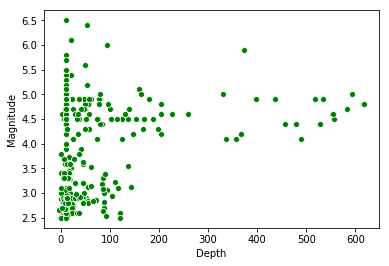

In [207]:
sns.scatterplot(x= earth_quake_encoded['depth'].values, y=earth_quake_encoded['mag'].values, data = earth_quake_encoded, color = 'green')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()

<h3>2. Regression plot between Depth and Magnitude:</h3>
<p> The regression plot between the depth and the magnitude values shows a linear relationship between the two, instead of showing deviations on the both sides. </p>

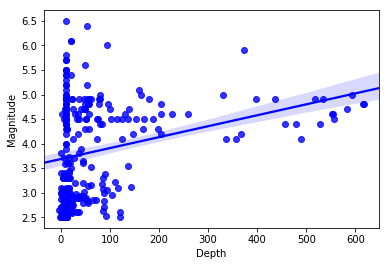

In [208]:
import seaborn as sns
reg_plot_depth_mag = pd.DataFrame(columns =['Depth', 'Magnitude'])
reg_plot_depth_mag['Depth'] = earth_quake_encoded['depth'].values
reg_plot_depth_mag['Magnitude'] = earth_quake_encoded['mag'].values

sns.regplot(x=reg_plot_depth_mag['Depth'], y = reg_plot_depth_mag['Magnitude'], data = reg_plot_depth_mag, color = 'blue')

<h3>3. Scatter Plot between Number of station required to measure the event versus magnitude </h3>
<p> As we can see, there is certainly no relationship between these two variables , however we can see a linear plot at a certain point along the NST axis. But that is of course of no use. </p>

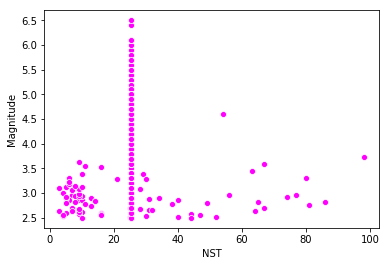

In [209]:
reg_plot_depth_mag['NST'] = earth_quake_encoded['nst']
sns.scatterplot(x= reg_plot_depth_mag['NST'], y = reg_plot_depth_mag['Magnitude'], data = reg_plot_depth_mag, color = 'magenta')

<h2> 4. Regression plot between the Root Mean square speed of the waves and the magnitude.</h2>
<p> The plot shows a linear regression among the two with certain deviations. But we can still ignore the irregularities due to the nature. Due to the not so significant amount of deviation along the regression line proves the linearity of the relationship. </p>

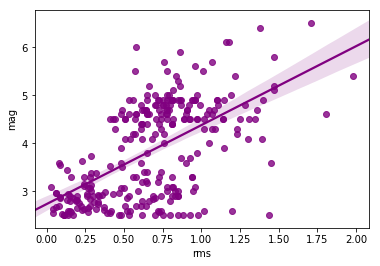

In [210]:
sns.regplot(x= earth_quake_encoded['rms'], y= earth_quake_encoded['mag'], data = earth_quake_encoded, color = 'purple')

<h3> 5. Regression plot between the horizontal distance of the recorded place with the depth of the rupture of the waves. </h3>
<p> The regression plot shows a large amount of deviation meaning that the relationship among the two is not linear. </p>

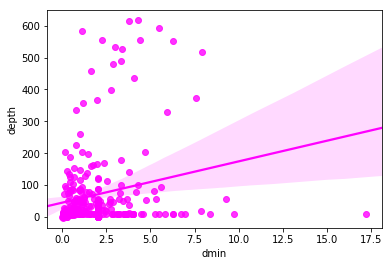

In [211]:
sns.regplot(x= earth_quake_encoded['dmin'], y = earth_quake_encoded['depth'], data = earth_quake_encoded, color = 'magenta')

<h3>6. Regression plot between the horizontal distance and the magnitude:</h3>
<p> The regression plot between the horizontal distance from the epicenter and the magnitude shows a linear regression plot but with higer deviations, basically implying non-linearity between the two variables. </p>

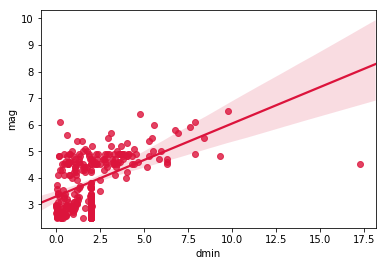

In [212]:
sns.regplot(x= earth_quake_encoded['dmin'], y = earth_quake_encoded['mag'], data = earth_quake_encoded, color = 'crimson')

<h3>7. Regression plot between azimuthal gap versus magnitude: </h3>
<p> The regression plot shows a negative linear regression with a minimal deviation simply stating the relationship between the two a negative linear regression. Despite the deviation in the plot, the linearity is noticeable in the plot. </p>
<p> On the other hand the negative regression signify the positive linear regression relationship between magnitude and the azimuthal gap. </p>

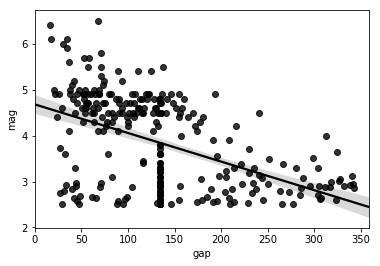

In [213]:
sns.regplot(x= earth_quake_encoded['gap'], y = earth_quake_encoded['mag'], data = earth_quake_encoded, color = 'black')

<h3> 8. Regression Plot between error in measuring magnitude </h3>
<p>This plot shows a negative linear regression with a minimal deviation, referring that, if the error in measuring the magnitude increases, the magnitude decreases. This is true and just basically verifying the data in the column. </p>

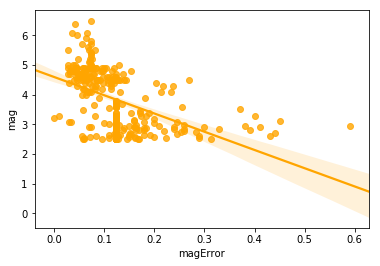

In [214]:
sns.regplot(x = earth_quake_encoded['magError'], y=earth_quake_encoded['mag'], color = 'orange')

<h2> Fetching data for United States only from USGS for the period of 2010-2019. </h2>
<p> USGS's API and Website provides users the flexibility of retrieving data from its servers by specifying the location, selecting the output format. <p>
  <p> So, we head over to <a href= 'https://earthquake.usgs.com'>USGS EARTHQUAKE DATABASE official website</a> and select the output format as CSV as well as select the location to Counterminous U.S. and hit search to fetch the data. I have already downloaded the file and saved it in a cloud bucket. Here I, just download the file, instead of repeatedly requesting through API. </p>

In [215]:
!wget -O usa_earth_quakes.csv https://s3.amazonaws.com/swastiknathgroup/query.csv

--2019-04-27 12:28:02--  https://s3.amazonaws.com/swastiknathgroup/query.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.98.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.98.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40908 (40K) [text/csv]
Saving to: ‘usa_earth_quakes.csv’

usa_earth_quakes.cs 100%[===================>]  39.95K  --.-KB/s    in 0.06s   

2019-04-27 12:28:03 (623 KB/s) - ‘usa_earth_quakes.csv’ saved [40908/40908]



<h2> Printing the dataset </h2>
<p>Let's first visualise the dataset and convert it into a pandas dataframe for easier management and access. 

In [216]:
usa_earthquakes = pd.read_csv('usa_earth_quakes.csv')
usa_earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-04-20T14:41:51.120Z,31.3561,-115.6707,10.0,4.5,mb,NaN,156.0,0.688,1.35,us,us700039mz,2019-04-24T00:24:31.561Z,"67km NNE of Camalu, Mexico",earthquake,5.1,2.0,0.085,41.0,reviewed,us,us
1,2019-04-06T21:01:41.937Z,30.8278,-114.0297,10.0,5.2,mww,NaN,131.0,0.736,0.64,us,us2000kbgw,2019-04-19T22:29:02.353Z,"71km SW of Puerto Penasco, Mexico",earthquake,2.5,1.8,0.039,62.0,reviewed,us,us


<h2>Obtaining a cleaner dataset </h2>
<p> In the following cell, we replace the null cell values with the column mean or with the value that has the highest occurence frequency per column. We drop unnecessary columns and data to obtain the final dataset for our work. We change columns with inappropriate datatypes to their appropriate ones for easier management. </p>

In [217]:
usa_earthquakes.fillna(earth_quake_dataframe.mean(), inplace = True)
usa_earthquakes['status'] = usa_earthquakes['status'].apply(lambda x:1 if (x =='reviewed') else 0)
usa_earthquakes.drop(['magType', 'id', 'magSource', 'locationSource', 'net'], axis = 1, inplace = True)
usa_earthquakes['time'] = pd.to_datetime(usa_earthquakes['time'])
usa_earthquakes['updated'] = pd.to_datetime(usa_earthquakes['updated'])
usa_earthquakes.head(2)

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,updated,place,type,horizontalError,depthError,magError,magNst,status
0,2019-04-20 14:41:51.120000+00:00,31.3561,-115.6707,10.0,4.5,25.4375,156.0,0.688,1.35,2019-04-24 00:24:31.561000+00:00,"67km NNE of Camalu, Mexico",earthquake,5.1,2.0,0.085,41.0,1
1,2019-04-06 21:01:41.937000+00:00,30.8278,-114.0297,10.0,5.2,25.4375,131.0,0.736,0.64,2019-04-19 22:29:02.353000+00:00,"71km SW of Puerto Penasco, Mexico",earthquake,2.5,1.8,0.039,62.0,1


<h2> Plotting Magnitudes in a timeframe: </h2>
<p> We use the scripting layer of Matplotlib to generate a timeframe of the magnitudes recorded in the dataset. We change the datetime(64) object into int objkect by using the matplotlib's dates.date2num function.  Next we use the scripting layer and pass in the required arguments. </p>

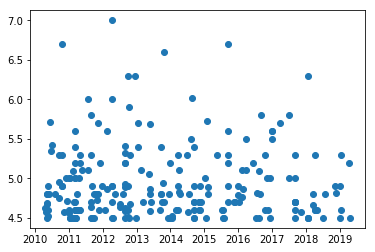

In [218]:
time_vs_mag_bar = pd.DataFrame(columns = {'time', 'mag'})
time_vs_mag_bar['time'] = usa_earthquakes['time']
time_vs_mag_bar['mag'] = usa_earthquakes['mag']
time_vs_mag_bar.to_csv('time_vs_mag.csv')

dates = mpl.dates.date2num(time_vs_mag_bar['time'].values)
plt.plot_date(dates, usa_earthquakes['mag'])
# import seaborn
# plt.figure(figsize = (100, 100))
# seaborn.barplot(x = time_vs_mag_bar['time'], y = time_vs_mag_bar['mag'], data = time_vs_mag_bar, ci = 'sd')

<h2> Generating the series plot for a better time-frame visualistation. </h2>
<p> We directly pass in the CSV file containnig the dataset to pandas form a Series object and matplotlib is intelligent enough to show the continuous flow of magnitude in a lower scale with respect to time automatically converted to an int object. <p>
  
  <p> In the following plot, we get a continuous plot of the magnitudes with respect to time. </p>

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4141: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


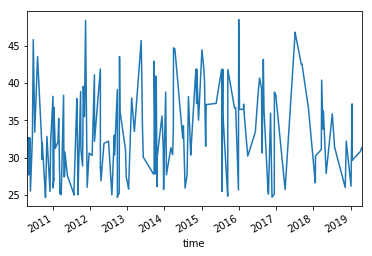

In [219]:
from pandas import Series
series = Series.from_csv('usa_earth_quakes.csv', header=0)
series.plot(style='-')
plt.show()

<h2> 3 Dimensional Visualisation of Depth vs. Root Mean Square Speed vs. Magnitude: </h2>
<p> Here we plot Depth in the X-Axis, Root Mean Square Speed in the Y-Axis and Magnitude of the recorded event in the Z-Axis to obtain a 3 dimensional plot for better understanding the realtionship between the varaiables. </p>

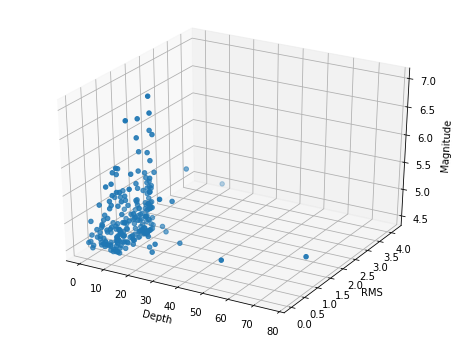

In [220]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Depth')
ax.set_ylabel('RMS')
ax.set_zlabel('Magnitude')
ax.scatter(usa_earthquakes['depth'], usa_earthquakes['rms'], usa_earthquakes['mag'])
plt.show()

<h2> 3 Dimensional Visualisation of Gap vs. Number of Station Required vs. Magnitude: </h2>
<p> Here we plot Depth in the X-Axis, Root Mean Square Speed in the Y-Axis and Magnitude of the recorded event in the Z-Axis to obtain a 3 dimensional plot for better understanding the realtionship between the varaiables. </p>

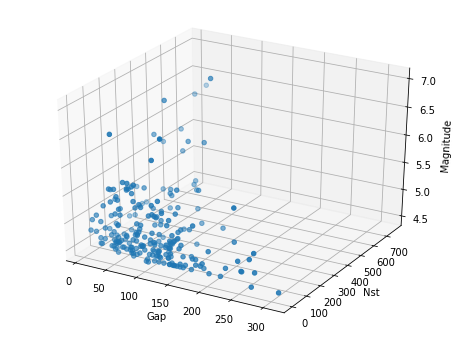

In [221]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(usa_earthquakes['gap'], usa_earthquakes['nst'], usa_earthquakes['mag'])
ax.set_xlabel('Gap')
ax.set_ylabel('Nst')
ax.set_zlabel('Magnitude')
plt.show()

<h2>Visulaisation of Earthquakes across USA : </h2>
<p> Let's visualise the earthquakes from the dataset in a map to get a real-world look at the places mostly affected. To de-clutter the map, I have used FastMarkerCluster to cluster the markers and unfold them with respect to the zooming. </p>

In [222]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
usa_quake_map = folium.Map(location=[usa_earthquakes['latitude'].mean(), 
                                usa_earthquakes['longitude'].mean()], 
                                zoom_start=4)

usa_quake_map.add_child(FastMarkerCluster(usa_earthquakes[['latitude', 'longitude']].values.tolist()))
usa_quake_map

In [0]:
#UNCOMMENT IF MAPS FAIL TO LOAD IN A NOTEBOOK ENVIRONMENT. 
# usgs_api_req_url = ('https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2010-04-19%2000:00:00&endtime=2019-04-26%2023:59:59&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125&minmagnitude=2.5&orderby=time&limit=2000')
# import requests
# earth_quake_json = requests.get(usgs_api_req_url).json()
# earth_quake_json
# geojson_url = 'https://s3.amazonaws.com/swastiknathgroup/gz_2010_us_040_00_500k.json'
# borough_json = requests.get(geojson_url).json()

<h2> Creating a HeatMap of the Earthquake Affected areas:</h2>
<p> We use the HeatMap function imported from the folium.plugins package to generate the heatmap. </p>
<p> We create a heat map to understand the frequency of the affected areas across USA. We see that, the map is heated mainly in the pacific coastline of USA. </p>

In [224]:
heat_quake_map = folium.Map(location=[usa_earthquakes['latitude'].mean(), 
                                usa_earthquakes['longitude'].mean()], 
                                zoom_start=4)
latlons = usa_earthquakes[['latitude', 'longitude']].values.tolist()
from folium.plugins import HeatMap
HeatMap(latlons).add_to(heat_quake_map)
heat_quake_map

<h2> Let's Get the places with highest earthquakes count  for the period of 2010-2019 in USA.</h2>
<p>Let's print the top earthquake heavy places across USA and create a dataframe representing the places and the earthquake count in that specific place. </p>

In [225]:
count = usa_earthquakes['place'].value_counts()
count
usa_top_earthquakes_df = count.rename_axis('place').reset_index(name='counts')
usa_top_earthquakes_df

#Let's Select top places with atleast 2 earthquake occurance:
usa_top = usa_top_earthquakes_df[0:18]
print(usa_top)
print(usa_top_earthquakes_df.shape)
fetcher = usa_earthquakes.set_index('place')
fetched = fetcher.loc[usa_top['place'], ['latitude', 'longitude']]
latitude_to_search = fetched['latitude']
longitude_to_search = fetched['longitude']


                                   place  counts
0                     Gulf of California      39
1                Baja California, Mexico       9
2            Baja California Sur, Mexico       5
3           68km ESE of Lakeview, Oregon       3
4   offshore Baja California Sur, Mexico       3
5                     Central California       3
6                               Oklahoma       3
7                    Northern California       3
8          73km SE of San Felipe, Mexico       3
9                         Bermuda region       2
10    11km WNW of Greenville, California       2
11       20km NNW of Borrego Springs, CA       2
12                  North Atlantic Ocean       2
13              19km ESE of Ocotillo, CA       2
14          67km ESE of Lakeview, Oregon       2
15              18km ESE of Ocotillo, CA       2
16                                  Utah       2
17                              Colorado       2
(161, 2)


<p> We notice here there are a total of 17 places that has the earthquake count greater than or equal to 2 in the last 10 years. And indeed, this places are certainly vulnerable to earthquakes, especially, Gulf of California, Baja California and Baja California Sur.  So we found our vulnerable to earthquake places in United States. </p> 

<h2> Let's Plot the vulnerable to earthquakes places to their respective earthquake counts. </h2>
<p> The following horizontal bar plot shows the frequency of earthquake counts with respective to their places. </p> 
<p> In the next, we will use the following places and their latitude and longitudes to find out the hotels that requires attention for implementing earthquake safety products. </p>

<Figure size 1440x720 with 0 Axes>

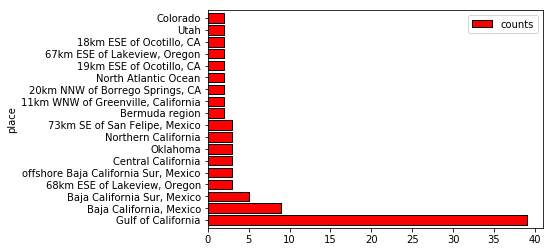

In [226]:
plotter = usa_top.set_index('place')
plt.figure(figsize = (20,10))
plotter.plot(kind = 'barh', width = 0.8, color = 'red', edgecolor = 'black')
plt.show()

<h3> Let's Take a printout of the vulnerable cities common names: </h3>
<p> We will list the places with their single unique occerance and instantiate a list object. Next we will import and use the Regular Expressions to eliminate certain patterns from the text to obtain the common name of the place and the name of their borough. At last we, printout the unique names.  </p>

In [0]:
place_list = usa_top['place'].unique()

In [0]:
import re
name_list = []
for vals in place_list:
  fg = re.sub('^\d+..\s\w+\s+of','', vals)  #the first parameter is a regex pattern.
  name_list.append(fg)

In [229]:
city_names = pd.DataFrame(columns = ['place'])
city_names['place'] = name_list
unique_cities = city_names['place'].unique()
top_common_places = pd.DataFrame(columns = ['Vulnerable Places'])
top_common_places['Vulnerable Places'] = unique_cities
top_common_places

,Vulnerable Places
0,Gulf of California
1,"Baja California, Mexico"
2,"Baja California Sur, Mexico"
3,"Lakeview, Oregon"
4,"offshore Baja California Sur, Mexico"
5,Central California
6,Oklahoma
7,Northern California
8,"San Felipe, Mexico"
9,Bermuda region


<h2>Connecting to Foursquare for obtainning the Hotel Details: </h2>
<p> We will use Foursquare API to search for the hotels nearby the recoded earthquake locations. We will pass in the recorded latitude and longitude of the places to the Foursquare places API to fetch the results in a JSON format. We will then format the response into a pandas dataframe for easy management.

<h3> Credentials for communicating with Foursquare API : </h3>
  

```
CLIENT_ID = 
CLIENT_SECRET = 
VERSION = 
```



In [0]:
#@title Hidden
CLIENT_ID = '0ZATPR54TH0VEOXPJM2XQN2ONXSIB1HAHHOMYZE1NMX2AOHW'
CLIENT_SECRET = 'WQJTSN1J24HUHFEQDTSW3ZMT4QIHSOIBGI0LWWKS5MAKQKHY'
VERSION =20180605

<h2> Fetching Hotels nearby the vulnerable to earthquake places: </h2>
<p> Let's create a custom helper function to obtain the JSON response from the Foursquare API and create a pandas dataframe with the selected responses. </p>

In [231]:
from progressbar import ProgressBar, Bar, Percentage
pbar = ProgressBar(widgets=[Percentage(), Bar()], maxval=300).start()
    
import requests
def whats_nearby(latitudes, longitudes, radius = 15000):
  nearby_places_list1 = []
  
  status = 'EXECUTION STARTED, PLEASE WAIT ->'
  for lat, lng in zip(latitudes, longitudes):
    for i in range(len(latitudes)):
        pbar.update(i+1)
    pbar.finish()
    query_url = 'https://api.foursquare.com/v2/venues/search?&query=hotel&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,                       
            CLIENT_SECRET, 
            VERSION, 
            lat, lng, 
            15000, 
            100)
    response = requests.get(query_url).json()['response']['venues']
    
    nearby_places_list1.append([(r['name'], 
                          r['location']['lat'], 
                          r['location']['lng'],
                          r['location']['formattedAddress']) for r in response])
  vulnerable_places = pd.DataFrame(item for nearby in nearby_places_list1 for item in nearby)
  vulnerable_places.columns = ['Venue', 'Venue Latitude', 'Venue Longitude', 'Address']
   
  return vulnerable_places

N/A%|                                                                         |

<h2> Fetching the potentially vulnerable to Earthquakes Hotels </h2>
<p> Here we use the previously created helper function to fetch the JSON response from the USGS servers and create a dataframe to display the results.</p>
<div></div>
<p> We also, clean the dataset by dropping null values and resetting the index values. </p>


In [232]:
business_list = whats_nearby(latitudes= latitude_to_search.values, longitudes = longitude_to_search.values)
fx = pd.DataFrame(business_list)
fx.dropna(inplace = True)
fx.reset_index()
print('EXECUTION COMPLETE')

100%|#########################################################################|
100%|#########################################################################|

EXECUTION COMPLETE


<h2> Showing the Potetntially Vulnerable Hotels near the earthquakes: </h2>


---

<h3> What is Vulnerable Occurence?</h3>
<p> Here we measure which hotels are nearby to the recorded places. Vulnerable Occurance is the number of occurance of the each recorded place as a nearby place per hotel. Simply stating, it's the measurement, how frequently each hotel appear as a nearby hotel per recoded place based on its latitude and longitude, within a specified radius of interest. </p>

<p> The higher the number of vulnerable occurance, the higher is the need of inspection in the specified hotel for risk factors to earthquakes. </p>

In [233]:
num = fx['Venue'].value_counts()
vulnerables = num.rename_axis('business_name').reset_index(name='Vulnerable Occurrence')
vulnerables

,business_name,Vulnerable Occurrence
0,Holiday Inn Hotel & Suites Trinidad,2
1,The Meyer's Hotel,2
2,Hockin Hotel,2
3,Holiday Inn Hotel & Suites TRINIDAD,2
4,The Globe Hotel,1
5,Mar De Cortez Hotel Of Baja,1
6,SureStay Hotel by Best Western Hollister,1
7,Old Sierra City Hotel,1
8,Travelodge,1
9,Super 8,1


<p> Here we find three hotels that needs attention severly, as their Vulnerable Occurence index is 2, meaning they have appeared as a nearby to two of our recorded place they are as following: </p>
<div> </div> <table> <th> Name of the potentially risky hotels</th>
  <tr>
    <td>Hockin Hotel</td>
  </tr>
  <tr>
    <td> Holiday Inn Hotel and Resorts, Trinidad</td>
    </tr>
      <tr>
        <td>The Meyer's Hotel </td>
        </tr>

<h2> Plotting the potentially risky to earthquakes hotels with respect to their <b>Vulnerable Occurances</b> :</h2>

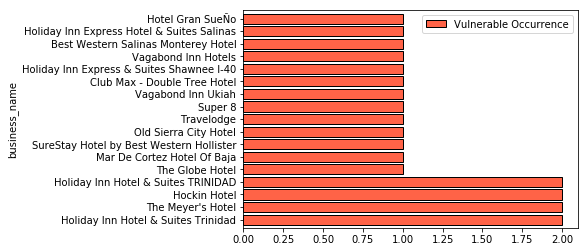

<Figure size 1440x720 with 0 Axes>

In [234]:
needs_attention = vulnerables
needs_attention.set_index('business_name', inplace = True)
needs_attention.plot(kind = 'barh', width = 0.8, edgecolor = 'black', color = 'tomato')
fig = plt.figure(figsize = (20, 10))
plt.show()

<h2> Dataset showing the unique potentially risky candidates with their respective location data for plotting. </h2>

In [235]:
fx['Venue'].value_counts()
fd_grouped = fx.groupby('Venue').mean()
fd_grouped.reset_index(inplace = True)
fd_grouped[0:51]

,Venue,Venue Latitude,Venue Longitude
0,Best Western Salinas Monterey Hotel,36.680713,-121.641309
1,Club Max - Double Tree Hotel,36.721769,-121.658569
2,Hockin Hotel,36.839771,-121.411908
3,Holiday Inn Express & Suites Shawnee I-40,35.386338,-96.919378
4,Holiday Inn Express Hotel & Suites Salinas,36.681925,-121.641387
5,Holiday Inn Hotel & Suites TRINIDAD,37.135739,-104.520621
6,Holiday Inn Hotel & Suites Trinidad,37.135125,-104.519573
7,Hotel Gran SueÑo,26.044445,-111.666072
8,Mar De Cortez Hotel Of Baja,36.789280,-121.661568
9,Old Sierra City Hotel,39.565857,-120.635155


<h2> Adding the potentially risky hotels into the Heatmap </h2>
<p> We plot each of the potentially risky candidates to our heatmap to better viusalise their location and the effectiveness of our analysis. We have used FastMarkerCluster to visualise the vulnearble hotels in the map. </p>

In [236]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
vulnerable_business_map = folium.Map(location = [usa_earthquakes['latitude'].mean(), 
                                usa_earthquakes['longitude'].mean()], tiles = 'OpenStreetMap',
                                zoom_start=4)
vulnerable_business_map.add_child(FastMarkerCluster(fd_grouped[['Venue Latitude', 'Venue Longitude']].values.tolist()))

folium.Circle([usa_earthquakes['latitude'].mean(),usa_earthquakes['longitude'].mean()], radius=1500000, color='red', opacity = 0.6, fill=False).add_to(vulnerable_business_map) 
folium.Circle([usa_earthquakes['latitude'].mean(),usa_earthquakes['longitude'].mean()], radius=2000000, color='red', opacity = 0.6, fill=False).add_to(vulnerable_business_map) 
folium.Circle([usa_earthquakes['latitude'].mean(),usa_earthquakes['longitude'].mean()], radius=2500000, color='red', opacity = 0.6, fill=False).add_to(vulnerable_business_map) 

from folium.plugins import HeatMap
latlons = usa_earthquakes[['latitude', 'longitude']].values.tolist()
HeatMap(latlons).add_to(vulnerable_business_map)
vulnerable_business_map

<p> We see, the hotel data retrieved from Foursquare are correct as the map shows, the hotels are very nearby the risky zones or heated zones. </p>

<h2> Let's Cluster the potentially risky candidates </h2>
<p> We use the KMeans Clustering to cluster the hotels we recieved as a response from the Foursquare API. As clustering is a unsupervised learning, let's drop the labels from the dataset and pass in the unlabelled dataset as a parameter into the KMeans clustering algorithm. We will cluster the hotels into five different clusters and plot them into a map. </p>

In [237]:
cluster_list = fx.set_index('Venue')
cluster_list
num_clusters = 5
clusters = cluster_list.drop('Address', 1)
kmeans_cls = KMeans(n_clusters = num_clusters, random_state = 0).fit(clusters)
kmeans_cls.labels_

array([2, 3, 3, 3, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int32)

<h2> Dataset showing all the potentially risky candidates along with their Cluster Labels. </h2>
<p>Let's visualise the dataset of hotels with their cluster labels and their addresses in a dataframe. <b>We might see duplicates in the dataframe, this is beacuse of different registered address. </b> </p>

In [238]:
cluster_list['Cluster Labels'] = kmeans_cls.labels_
cluster_list.reset_index(inplace = True)
# cls_rd = cluster_list.drop_duplicates()
# cls_copy = cluster_list
# cls_copy.drop_duplicates(inplace = True)
# cls_copy
cluster_list


,Venue,Venue Latitude,Venue Longitude,Address,Cluster Labels
0,Hotel Gran SueÑo,26.044445,-111.666072,"[Bahia de los Sueños, Baja California Sur, Méx...",2
1,Holiday Inn Express Hotel & Suites Salinas,36.681925,-121.641387,"[195 Kern St, Salinas, CA 93905, United States]",3
2,Hockin Hotel,36.857854,-121.435447,"[Buena Vista Road, Hollister, CA, United States]",3
3,Hockin Hotel,36.821687,-121.388369,"[Hollister, CA, United States]",3
4,SureStay Hotel by Best Western Hollister,36.866330,-121.402130,"[660 San Felipe Rd, Hollister, CA 95023, Unite...",3
5,Club Max - Double Tree Hotel,36.721769,-121.658569,"[Salinas, CA 93906, United States]",3
6,Mar De Cortez Hotel Of Baja,36.789280,-121.661568,"[17790 Berta Canyon Rd, Salinas, CA 93907, Uni...",3
7,Best Western Salinas Monterey Hotel,36.680713,-121.641309,"[175 Kern St, Salinas, CA 93905, United States]",3
8,Holiday Inn Express & Suites Shawnee I-40,35.386338,-96.919378,"[4909 N. Union, Shawnee, OK 74804, United States]",4
9,Travelodge,39.173048,-123.212033,"[1720 N State St (at US-101), Ukiah, CA 95482,...",0


<h2> Let's Visualise the clusters into the map. </h2>
<p> Let's plot the dataset into a map and visualise the cluster of hotels on the map.</p>
<p> The clusters are combined together when zoomed out, but zoom in to visualise them indivudually. </p>

In [240]:
import matplotlib.cm as cm
import matplotlib.colors as colors
lat_usa = 37.09
lng_usa = -95.71
mapping_earthquake_cluster = folium.Map(location = [lat_usa, lng_usa], zoom_start = 4)
       
cluster_in = [int(i) for i in cluster_list['Cluster Labels']]
  
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cluster_list['Venue Latitude'], cluster_list['Venue Longitude'], cluster_list['Venue'], cluster_in):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapping_earthquake_cluster)
mapping_earthquake_cluster

# Analysis Results and a few words <a name = 'results'></a>

<h3> Gulf of California, Baja California and Baja California Sur </h3>
As according to our analysis there a total of 161 unique places of recorded earthquakes, among which there are 18 places where earthquakes is more frequent in the last 10 years, with the highest counts 39 in 10 years at Gulf of California, 9 in 10 years at Baja California and 5 in 10 years at Baja California Sur. These three places have been the most unstable and consistent in terms of earthquakes in the last 10 years. 

<h3> Holiday Inn and Suites, Trinidad;  The Meyer Hotel;  Hockin Hotel </h3>
With the analysis results in hand, we see there are a total of 16 unique hotels which are potentilly risky to the earthquakes due to their position, with the higher Vulnerable Occurence in the above three hotels, stating that, they appeared as a nearby place to the above mentioned numbers of different earthquake recorded. 

The clustered map shows the similarity between the hotels learnt in the unsupervised leanring process, clustering. The final dataset have been generated with the hotels, their locations and formatted addresses for easy access. 

# Conclusion <a name = 'conlcusion'></a>

The assignment was intended for determining the potentially risky places to earthquakes and finding the potentially vulnerable hotels around the places of most frequent earthquakes. With different data science tools ranging from data validation to visualisation helped in creating the assignment. 

The clusters will help in segmenting the hotels with similar attributes in the map for the sake of better understanding the potential risk factors. 

The final decision about the scrutiny in the hotels for earthquake safety and upgrade is completely upon the government city management team, the hotel stakeholders and surveyers.





```
Assignee: 
Swastik Nath. 
```





---


>"*When an idea exclusively occupies the mind, it is transformed into an actual physical or mental state.''*
<div> </div>  <p> ~ Swami Vivekananda</p>